# Using meta-research to improve science - 2020
## Studying methodological citations
### Journal Policy anaylysis


#### Importing abstraction data

**Datasets:**



1.   Abstraction data for Cell Biology
2.   Abstraction data for Physiology
3.   Abstraction data for Plant Science

In [11]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import rc
import matplotlib.pyplot as plt

matplotlib.rc('font', family='sans-serif') 
matplotlib.rc('font', serif='Arial') 

%matplotlib inline

In [39]:
#specify file location
data_path = Path().home() / 'MetaScience'
data_file = 'policy-{}.csv'

bio = pd.read_csv((data_path / data_file.format('bio')).open('rb'), sep = ';')
neuro = pd.read_csv((data_path / data_file.format('ns')).open('rb'), sep = ';',usecols=np.arange(0,13))
psych = pd.read_csv((data_path / data_file.format('psych')).open('rb'), sep = ';')

df = pd.concat([neuro,bio,psych],keys=['neuro','bio','psych']).dropna(how='all',axis=0)

bio_N = df.loc['bio'].shape[0]
neuro_N = df.loc['neuro'].shape[0]
psych_N = df.loc['psych'].shape[0]

print(f"{bio_N} journals abstracted for Biology")
print(f"{neuro_N} journals abstracted for Neuroscience")
print(f"{psych_N} journals abstracted for Psychiatry")

75 journals abstracted for Biology
222 journals abstracted for Neuroscience
145 journals abstracted for Psychiatry


#### Colour Scale

In [41]:
#We define colors to be used in all plots
Neuro_7colours = np.array(['#FFFCEB',
                            '#FFF6C2',
                            '#FFED85',
                            '#FFE347',
                            '#E0BF00',
                            '#B89C00',
                            '#8F7900'])

Psych_7colours = np.array(['#FFEEEB',
                            '#FFCBC2',
                            '#FF9785',
                            '#FF6347',
                            '#E02200',
                            '#B81C00',
                            '#8F1500'])

Bio_7colours = np.array(['#EDF3FD',
                            '#C8DAF9',
                            '#90B5F3',
                            '#598FEE',
                            '#1558CB',
                            '#1248A5',
                            '#0E3881'])

colour_dict  = {
    'Biology': Bio_7colours[::-1],
    'Neurosciences': Neuro_7colours[::-1],
    'Psychiatry': Psych_7colours[::-1]
}

### Data analysis

In [42]:
def calculate_journal_percent(df,col):
    new_df = None
    new_df = df.groupby(col)["Journal name"].count().reset_index()
    new_df.columns = [col,'n_journals']
    new_df['breakdown_percent'] = np.round((new_df.n_journals / new_df.n_journals.sum())*100,2)
    return new_df
  
def check_journal_requirements(row):
    return int(min(1,row["Supplementary"])  + min(1,row["Repositories"]) + min(1,row["Journal protocol_A"]) + min(1,row["Unspecified"]))

### Description of previously described methods

In [122]:
def create_fig(data, title, colour_dict, offsets=[1,1.15]):
    fig, ax = plt.subplots(figsize=(12, 4))
    total = 0
    for i,k in enumerate(data.keys()):
        total = 0
        n_grades = len(data[k])
        colours = colour_dict[k][0::int(np.ceil(7/n_grades))]
        for n in range(0, n_grades):
            left = total if (n != n_grades -1 or offsets[0]==1) else total + 5,
            plt.barh(i,data[k].breakdown_percent[n],
                     left=left,
                     color=colours[n],
                     edgecolor=colours[0],
                     align='center',
                     label=n)
            xcenters = (total if (n < n_grades-1 or offsets[0]==1) else total + 8) 
            xcenters += data[k].breakdown_percent[n] / 2
            
            perc = int(np.round(data[k].breakdown_percent[n]))
            if (perc<3):
                xcenters += offsets[1]

            ax.text(xcenters, i, f"{perc}%",color=('w' if n ==0 else 'k'), ha='center', va='center',fontsize=15)
            total += data[k].breakdown_percent[n]       

    labels = ["{} \n({} journals)".format(k,data[k].n_journals.sum()) for k in data.keys()]
    plt.yticks([0,1,2],labels,fontsize=15)

    ax.tick_params(axis='y', labelsize=15, colors='grey')

    plt.xticks(fontsize=15)
    ax.set_xlabel('% of papers', horizontalalignment='right',x=0.975, fontsize=15, color='darkgrey')
    # Hide spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])

    plt.title(title,
              fontsize=19
              ,loc='center'
             ,pad=20)  


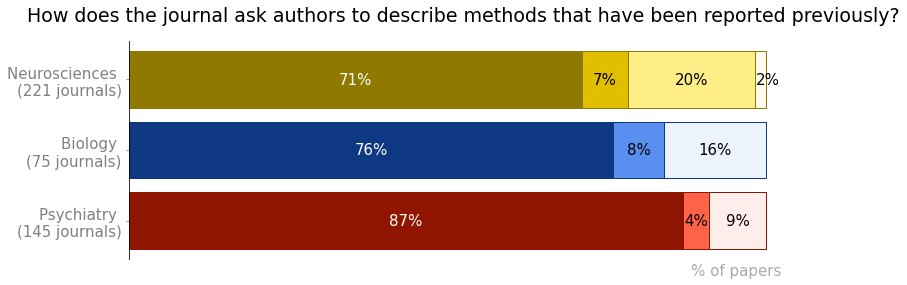

In [123]:
data = {
    'Psychiatry': calculate_journal_percent(df.loc['psych'],"Meth_A"),
    'Biology': calculate_journal_percent(df.loc['bio'],"Meth_A"),   
    'Neurosciences': calculate_journal_percent(df.loc['neuro'],"Meth_A")
}
title = "How does the journal ask authors to describe methods that have been reported previously?"

create_fig(data,title,colour_dict)

### Description of modifications of previously described methods

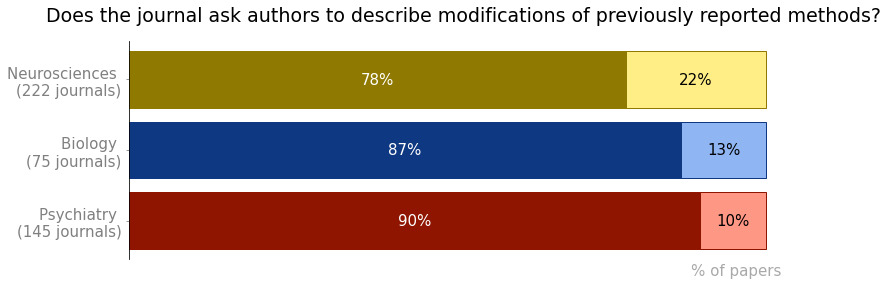

In [124]:
data = {
    'Psychiatry': calculate_journal_percent(df.loc['psych'],"Meth_B"),
    'Biology': calculate_journal_percent(df.loc['bio'],"Meth_B"),   
    'Neurosciences': calculate_journal_percent(df.loc['neuro'],"Meth_B")
}
title = "Does the journal ask authors to describe modifications of previously reported methods?"

create_fig(data,title,colour_dict)

### Description of methods for reproducibility

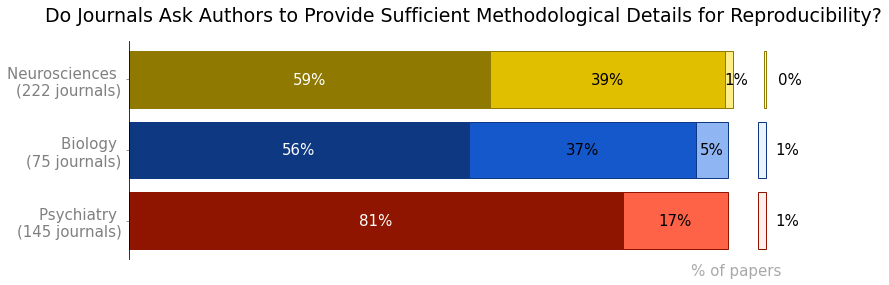

In [126]:
data = {
    'Psychiatry': calculate_journal_percent(df.loc['psych'],"Repro_A"),
    'Biology': calculate_journal_percent(df.loc['bio'],"Repro_A"),   
    'Neurosciences': calculate_journal_percent(df.loc['neuro'],"Repro_A")
}
title = "Do Journals Ask Authors to Provide Sufficient Methodological Details for Reproducibility?"

create_fig(data,title,colour_dict, offsets=[2,1.15])
# plt.savefig("figure_repro.png",bbox_inches="tight", dpi=600);    

# Inclusion of Detailed Methods Provided Elsewhere

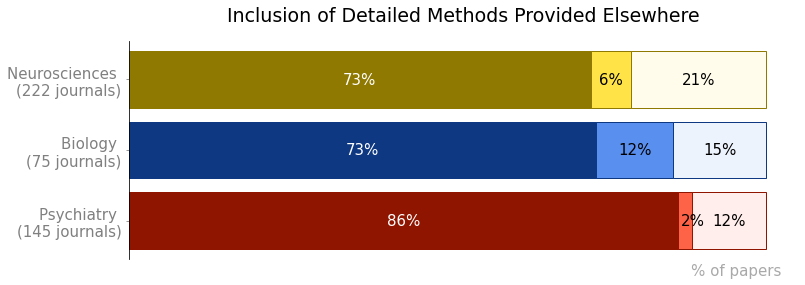

In [129]:
df['combined_categories'] = df.apply(check_journal_requirements,axis=1)

data = {
    'Psychiatry': calculate_journal_percent(df.loc['psych'],"combined_categories"),
    'Biology': calculate_journal_percent(df.loc['bio'],"combined_categories"),   
    'Neurosciences': calculate_journal_percent(df.loc['neuro'],"combined_categories")
}
title = "Inclusion of Detailed Methods Provided Elsewhere"

create_fig(data,title,colour_dict)